## Exercise 2
**3.** Implement a class MLEClassifier that works on categorical problems (X and Y discrete)
and predicts classes based on the estimated posterior probabilities.

In [25]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
from tqdm import tqdm

In [26]:
class MLEClassifier:
    def getName(self):
        return " MLEClassifier"
    def train(self, X, Y):
        self.X = X
        self.Y = Y
        self.dict = {}
        for x, y in zip(self.X, self.Y):
            temp = ",".join(x)
            if temp not in self.dict.keys():
                self.dict[temp] = {}
            newDict = self.dict[temp]
            if y not in newDict.keys():
                newDict[y] = 0
            newDict[y] += 1
        for key in self.dict.keys():
            sum = 0
            for newKey in self.dict[key]:
                sum += self.dict[key][newKey]
            for newKey in self.dict[key]:
                self.dict[key][newKey] /= sum

    def predict(self, X):
        res = []
        # print(self.dict)
        for x in X:
            predict = ",".join(x)
            try:
                res.append(max(self.dict[predict], key=self.dict[predict].get))
            except KeyError:
                res.append('none')
        return res


# Read dataset
df = pd.read_csv('breast-cancer.csv').to_numpy()
model = MLEClassifier()
X = df[:, :9]
Y = df[:, -1]
model.train(X, Y)
model.predict([["'40-49'","'premeno'","'15-19'","'0-2'","'yes'","'3'","'right'","'left_up'","'no'"]])


["'recurrence-events'"]

**4.** Implement a class BayesianCategoricalClassifier. It should receive a parameter
is_naive at initialization time to specify whether it should behave in a naive way.
Models may be learned without the adjusted frequencies.

In [31]:
class BayesianCategoricalClassifier:
    def __init__(self,is_naive):
        self.is_naive=is_naive
    def getName(self):
        return " Bayesian " +(' naive' if self.is_naive else '')
    def train(self,X,Y):
        classes = np.unique(Y)
        self.m=set()
        self.n=set()
        self.Di={}
        self.table = {}
        self.pi={}
        self.ni={}
        if not (self.is_naive):
            for k in classes:
                self.Di[k]=[]
                for x,y in zip(X,Y):
                    if(y==k):
                        self.Di[k].append(x)
                for di in self.Di:
                    self.ni[di]=len(self.Di[di])
                    self.pi[di]=len(self.Di[di])/len(X)
                    self.table[k] ={}
                    for x in self.Di[di]:
                        self.m.add(x[0])
                        self.n.add(x[1])
                        if not x[0] in self.table[k]:
                            self.table[k][x[0]]={}
                        if not x[1] in self.table[k][x[0]]:
                            self.table[k][x[0]][x[1]]=0
                        self.table[k][x[0]][x[1]]+=1/self.ni[di]
        else:
            for k in classes:
                self.Di[k]=[]
                for x,y in zip(X,Y):
                    if(y==k):
                        self.Di[k].append(x)
                for di in self.Di:
                    self.ni[di]=len(self.Di[di])
                    self.pi[di]=len(self.Di[di])/len(df)
                    self.table[k] ={}
                    for x in self.Di[di]:
                        self.m.add(x[0])
                        if not "x1"+x[0] in self.table[k]:
                            self.table[k]["x1"+x[0]]=0
                        if not "x2"+x[1] in self.table[k]:
                            self.table[k]["x2"+x[1]]=0
                        self.table[k]["x1"+x[0]]+=1/self.ni[di]
                        self.table[k]["x2"+x[1]]+=1/self.ni[di]

    def predict(self,X):
        resTotal=[]
        for x in X:
            res = {}
            if not self.is_naive:
                for k in self.Di.keys():
                    try:
                        res[k]=self.pi[k]*self.table[k][x[0]][x[1]]
                    except KeyError:
                        res[k]=self.pi[k]*(1/(self.ni[k]+len(self.n)*len(self.m)))
            else:
                for k in self.Di.keys():
                    try:
                        res[k]=self.pi[k]*self.table[k]["x1"+x[0]]*self.table[k]["x2"+x[1]]
                    except KeyError:
                        try:
                            res[k]=self.pi[k]*1/(self.ni[k]+len(self.m)) * self.table[k]["x2"+x[1]]
                        except KeyError:
                            res[k]=0
            resTotal.append(max(res, key=res.get))
        return resTotal

df = pd.read_csv('breast-cancer.csv').to_numpy()
X = df[:, :9]
Y = df[:, -1]
model = BayesianCategoricalClassifier(False)
model.train(X,Y)
model.predict([["'40-49'","'premeno'","'15-19'","'0-2'","'yes'","'3'","'right'","'left_up'","'yes'"]])


["'no-recurrence-events'"]

**5.** Create a 3-plot series and depict the learning curves of the MLEClassifier and the BayesianCategorialClassifier (full and naive) on the cancer dataset. Which learner works best here? 

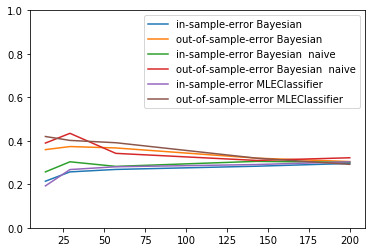

In [28]:
from smlutil import *
df = pd.read_csv('breast-cancer.csv').to_numpy()
X = df[:, :2]
Y = df[:, -1]

ax = plot_learning_curves(BayesianCategoricalClassifier(False),X,Y)
ax = plot_learning_curves(BayesianCategoricalClassifier(True),X,Y,ax)
ax = plot_learning_curves(MLEClassifier(),X,Y,ax)

**6.** Create the same 3-plot series for the symptoms dataset. Conduct the same kind of
analysis.
What do you find different to the performance on the breast-cancer dataset?
Do you think that other learners could do better on the data? Why or why not?

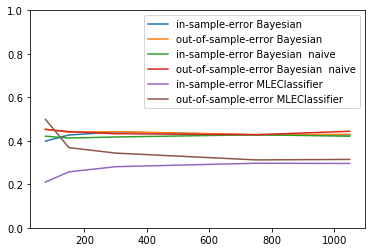

In [29]:
from smlutil import *
df = pd.read_csv('symptoms.csv').to_numpy()
X = df[:, :4]
Y = df[:, -1]
ax = plot_learning_curves(BayesianCategoricalClassifier(False),X,Y)
ax = plot_learning_curves(BayesianCategoricalClassifier(True),X,Y,ax)
ax = plot_learning_curves(MLEClassifier(),X,Y,ax)

**7.**
Implement a class BayesianNumericalClassifier. It should receive a parameter is_naive
at initialization time to specify whether it should behave in a naive way. Models should
be learned assuming a joint normal distribution (you might want to look at np.cov and
scipy.stats.multivariate_normal.pdf).
Plot the learning curves of the full and naive Bayesian classifier on Iris. Which one is
better? Explain!

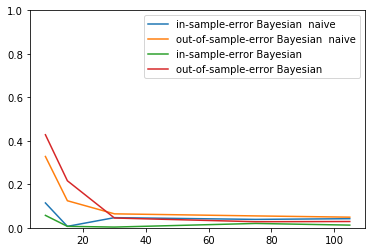

In [32]:
from scipy.stats import multivariate_normal

class BayesianNumericalClassifier:
    def __init__(self, is_naive):
        self.is_naive = is_naive
    def getName(self):
        return " Bayesian " +(' naive' if self.is_naive else '')
    def train(self, X, Y):
        self.D = {}
        for x, y in zip(X, Y):
            if y not in self.D.keys():
                self.D[y] = []
            self.D[y].append(x)
        self.n = {}
        self.Pc = {}
        self.miu = {}
        self.Z = {}
        self.cov = {}
        self.cov2 = {}
        for key in self.D:
            self.n[key] = len(self.D[key])
            self.Pc[key] = self.n[key]/len(X)
            self.miu[key] = (1/self.n[key]) * np.sum(self.D[key], axis=0)
            self.Z[key] = self.D[key]-self.miu[key].transpose()
            if not self.is_naive:
                self.cov[key] = 1/self.n[key] * np.dot(self.Z[key].transpose(), self.Z[key])
                self.cov[key] = self.cov[key].astype("float")
            else:
                self.cov[key] = {}
                d=len(self.Z[key][0])
                covMat = np.zeros((d,d))
                for i in range(d):
                    # cov for manual equation
                    self.cov[key][i] =  (1/self.n[key]) * np.dot(self.Z[key][:, i], self.Z[key][:, i].transpose())
                    # cov for ultivariate_normal.pdf
                    covMat[i][i]= (1/self.n[key]) * np.dot(self.Z[key][:, i], self.Z[key][:, i].transpose())
                self.cov2[key]=covMat

    def predict(self, X):
        resTotal = []
        for x in X:
            res = {}
            d = len(x)
            if not self.is_naive:
                for key in self.D:
                    # Error with singular matrix
                    # Fi = ((1/((math.sqrt(2*math.pi)**d) * np.sqrt(np.linalg.det(self.cov[key])))) * np.exp(-((x-self.miu[key]).transpose().dot(np.linalg.inv(self.cov[key])).dot((x-self.miu[key])))/2))
                    Fi = multivariate_normal.pdf(x, mean=self.miu[key], cov=self.cov[key],allow_singular=True)
                    Total = Fi * self.Pc[key]
                    res[key] = Total
            else:
                for key in self.D:
                    # Error with 0 in division
                    # Fi = 1
                    # for d in range(len(x)):
                    #         Fi *=((1/(math.sqrt(2*math.pi) * math.sqrt(self.cov[key][d]))) * np.exp(-((x[d]-self.miu[key][d])**2)/(2*self.cov[key][d])))
                    Fi = multivariate_normal.pdf(x, mean=self.miu[key], cov=self.cov2[key],allow_singular=True)
                    Total = Fi * self.Pc[key]
                    res[key] = Total
            resTotal.append(max(res, key=res.get))
        return resTotal

data = pd.read_csv('iris.csv').to_numpy()
X = data[:, :4]
Y = data[:, -1]
model.train(X,Y)

ax = plot_learning_curves(BayesianNumericalClassifier(True),X,Y)
ax = plot_learning_curves(BayesianNumericalClassifier(False),X,Y,ax)